In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Scoring/Test/Tổng hợp quan trong/Dữ liệu/Dữ liệu sau xử lý/data_filled.csv')

In [4]:
df.head()

,Unnamed: 0,LoanBriefID,LoanAmount,LoanTime,IsReMarketing,ProvinceId,Gender,Age,JobId,ImcomeType,IsMerried,NumberBaby,RelationshipType,LivingWith,RateTypeId,ProductId,ResidentType,LoanAmountExpertiseAI,NumberCall,score,label_result
0,0,1095199,30000000,12,0,1,0.0,31,123.0,1.0,1.0,1.0,1.0,1.0,10,5,6,48800000.0,0.0,1.0,True
1,1,950035,12000000,6,1,1,0.0,30,123.0,5.0,1.0,2.0,1.0,3.0,10,2,4,13600000.0,1.0,0.6,False
2,2,975972,10000000,9,1,1,0.0,29,123.0,1.0,1.0,1.0,1.0,2.0,10,5,4,24000000.0,1.0,0.9,True
3,3,943144,5000000,9,1,79,0.0,25,123.0,5.0,0.0,0.0,2.0,1.0,10,2,4,0.0,8.0,0.9,True
4,4,1015972,16000000,9,0,1,0.0,28,123.0,1.0,0.0,1.0,15.0,0.0,10,2,7,24100000.0,0.0,0.4,False


In [5]:
df.columns

Index(['Unnamed: 0', 'LoanBriefID', 'LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall',
       'score', 'label_result'],
      dtype='object')

In [6]:
features = ['LoanBriefID', 'LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall']

In [7]:
X = df[features]
y = df["label_result"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [10]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# Create a Sequential Neural Network model 
model = Sequential()
# Create an Input and a Hidden Layer
model.add(Dense(units=50,activation="relu",kernel_initializer="he_uniform"))
# Create an Output Layer
model.add(Dense(units=1,activation="sigmoid"))
# Now, my model is ready to compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
model.fit(X_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
112/112 [==============================] - 1s 3ms/step - loss: 0.6082 - accuracy: 0.6892
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.8176
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.8224
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8252
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8279
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8277
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8296
Epoch 8/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8312
Epoch 9/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8324
Epoch 10/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4067 - accura

In [26]:
# Predict the X_test results
y_pred = model.predict(X_test)

In [27]:
y_pred

array([[0.7922245 ],
       [0.52097625],
       [0.79439497],
       ...,
       [0.96734416],
       [0.21576253],
       [0.89755106]], dtype=float32)

In [34]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(True)
  else:
    y_pred_label.append(False)

In [ ]:
y_pred_label

Đánh giá mô hình sử dụng ---- sklearn ---- 


Vấn đề: Output của mô hình ANN ở trên sử dụng Tensorflow có kiểu dữ liệu ở đầu ra khác với kiểu dữ liệu đầu vào yêu cầu của sklearn 

In [36]:
# Hàm tính độ chính xác, ma trận nhầm lẫn, Recall, precision, f1 score và vẽ đồ thị ROC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def evaluate_model(model, X_test, y_test, y_prediction):
  print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
  #Accuracy
  print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
  # confusion_matrix
  print('2. confusion_matrix:')
  print(confusion_matrix(y_pred_label,y_test))
  # recall_score
  print('3. recall_score: ', recall_score(y_pred_label,y_test))
  # precision_score
  print('4. precision_score: ', precision_score(y_pred_label,y_test))
  # f1_score
  print('5. f1_score: ', f1_score(y_pred_label,y_test))
  # ROC plot
  # print('6. Biểu đồ ROC của mô hình:')
  # metrics.plot_roc_curve(model, X_test, y_test)
  # plt.show()

In [18]:
 evaluate_model(model, X_test, y_test, y_pred)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8336601307189543
2. confusion_matrix:
[[ 163  119]
 [ 390 2388]]
3. recall_score:  0.8596112311015118
4. precision_score:  0.9525329078579976
5. f1_score:  0.903689687795648


# **Tensor Flow**

**Tính Accuracy TensorFlow**

In [20]:
import tensorflow as tf

In [21]:
m = tf.keras.metrics.Accuracy()

In [22]:
m.update_state(y_test,y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3060.0>

In [23]:
print("Accuracy: ",m.result().numpy())

Accuracy:  0.8336601


Vẽ ROC, tính ACU

In [39]:
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

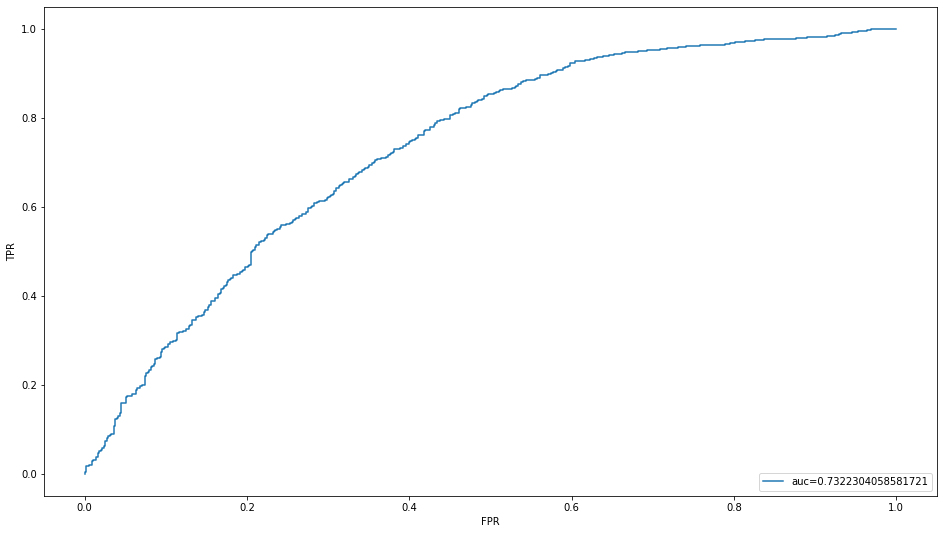

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()